# Simulaciones del Atractor de Lorenz

### Variación de la dinámica con cambios en condiciones iniciales

**Caso 1** ($ρ=28$, $σ=10$, $β=8/3$, $x=y=z=1$):
- Comportamiento caótico clásico
- Trayectorias sensibles a perturbaciones mínimas
- Formación del patrón de mariposa característico

**Caso 2** ($ρ=28$, $σ=10$, $β=8/3$, $x=1.002025$, $y=0.2$, $z=0.4$):
- Pequeñas variaciones iniciales generan trayectorias radicalmente diferentes
- Demostración práctica del "efecto mariposa"
- Misma estructura de atractor pero con evolución temporal distinta

**Caso 3** ($ρ=18$, $σ=9$, $β=10/3$, $x=2$, $y=0.009$, $z=0.7$):
- Comportamiento menos caótico
- Posible convergencia a órbitas periódicas
- Estructura del atractor más simple

### Efecto de la variación de parámetros

| Parámetro | Efecto en la dinámica | Valor crítico |
|-----------|-----------------------|---------------|
| **ρ** | Controla la transición a caos (ρ≈24.74) | $ρ<1$: estable<br>1<$ρ$<$24.74$: bifurcaciones<br>$ρ$>$24.74$: caos |
| **σ** | Afecta la tasa de mezcla energética | Valores altos aumentan rigidez |
| **β** | Determina la contracción del volumen | Influencia en la geometría del atractor |

**#Análisis comparativo**:
- $ρ=28$ produce caos bien desarrollado
- $ρ=18$ puede mostrar comportamiento cuasi-periódico
- La reducción de σ suaviza las transiciones

### Comparación Detallada: Método de Euler vs. RK4 para el Atractor de Lorenz

### Tabla Comparativa

| Característica               | Método de Euler                     | Método RK4                          |
|------------------------------|-------------------------------------|-------------------------------------|
| **Precisión**                | $O(h)$ - Baja precisión               | $O(h⁴)$ - Alta precisión              |
| **Estabilidad**              | Inestable con pasos grandes         | Más estable con pasos moderados     |
| **Costo Computacional**      | 1 evaluación por paso (económico)   | 4 evaluaciones por paso (costoso)   |
| **Error Acumulado**          | Crece rápidamente                   | Se mantiene controlado              |
| **Captura de No Linealidades**| Pobre                               | Excelente                           |
| **Requisitos de Paso (h)**   | Requiere h muy pequeño $(~0.001)$     | Permite h mayores $(~0.01)$           |
| **Conservación de Estructura**| Distorsiona el atractor             | Preserva la geometría del atractor  |

### Análisis Cualitativo

**Para el sistema de Lorenz**:

1. **Sensibilidad a Condiciones Iniciales**:
   - Euler amplifica artificialmente los errores iniciales
   - RK4 minimiza este efecto al mantener mejor la trayectoria real


### 1. Configuración inicial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

### 2. Definición del sistema de Lorenz

$t$: tiempo (no se usa explícitamente en ecuaciones autónomas)

$state$: vector de estado $[x, y, z]$

$sigma$, $rho$, $beta$: parámetros del sistema

derivadas $[\frac{dx}{dt}, \frac{dy}{dt}, \frac{dz}{dt}]$

In [2]:
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

### 3. Implementación del Método de Euler

$f$: función que define el sistema de ecuaciones

initial_state: condiciones iniciales $[x0, y0, z0]$

$t0$: tiempo inicial

$tf$: tiempo final

$dt$: paso de tiempo

parámetros del sistema $[sigma, rho, beta]$

$t$: array de tiempos

$states$: array de estados en cada tiempo

In [3]:
def euler_method(f, initial_state, t0, tf, dt, params):
    # Inicialización
    n_steps = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, n_steps)
    states = np.zeros((n_steps, 3))
    states[0] = initial_state
    
    # Iteración de Euler
    for i in range(n_steps - 1):
        states[i+1] = states[i] + dt * f(t[i], states[i], *params)
    
    return t, states

### 4. Implementación del Método de Runge-Kutta 4 (RK4)

In [4]:
def rk4_method(f, initial_state, t0, tf, dt, params):
    """
    Implementación del método de Runge-Kutta de 4to orden
    Args:
        f: función que define el sistema de ecuaciones
        initial_state: condiciones iniciales [x0, y0, z0]
        t0: tiempo inicial
        tf: tiempo final
        dt: paso de tiempo
        params: parámetros del sistema [sigma, rho, beta]
    Returns:
        t: array de tiempos
        states: array de estados en cada tiempo
    """
    # Inicialización
    n_steps = int((tf - t0) / dt) + 1
    t = np.linspace(t0, tf, n_steps)
    states = np.zeros((n_steps, 3))
    states[0] = initial_state
    
    # Iteración RK4
    for i in range(n_steps - 1):
        k1 = dt * f(t[i], states[i], *params)
        k2 = dt * f(t[i] + dt/2, states[i] + k1/2, *params)
        k3 = dt * f(t[i] + dt/2, states[i] + k2/2, *params)
        k4 = dt * f(t[i] + dt, states[i] + k3, *params)
        
        states[i+1] = states[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, states

### 5. Simulación para caso 1

In [5]:
# Parámetros y condiciones iniciales (primer caso del proyecto)
sigma, rho, beta = 10, 28, 8/3
initial_state = np.array([1.0, 1.0, 1.0])  # x0, y0, z0

# Configuración temporal
t0, tf, dt = 0, 50, 0.01

# Ejecutar ambos métodos
t_euler, states_euler = euler_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))
t_rk4, states_rk4 = rk4_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))

### 5.1. Visualización de resultados

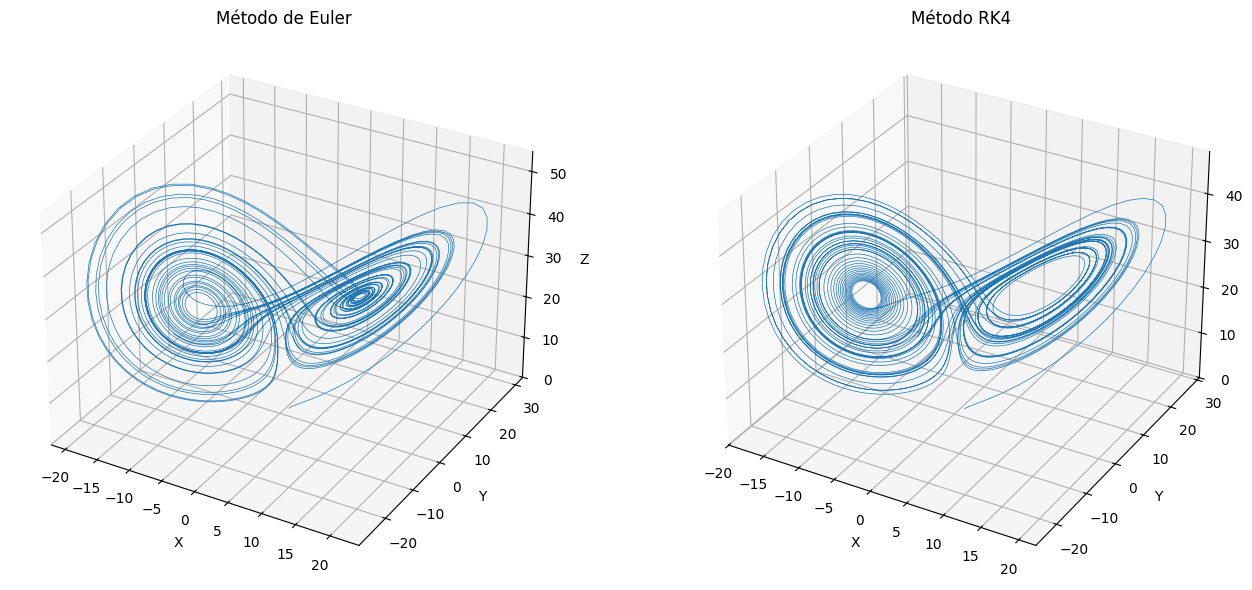

In [6]:
# Gráficas de las trayectorias en 3D
fig = plt.figure(figsize=(14, 6))

# Método de Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(states_euler[:, 0], states_euler[:, 1], states_euler[:, 2], lw=0.5)
ax1.set_title("Método de Euler")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Método RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2], lw=0.5)
ax2.set_title("Método RK4")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

### 5.2. Comparación de métodos (gráficas temporales)

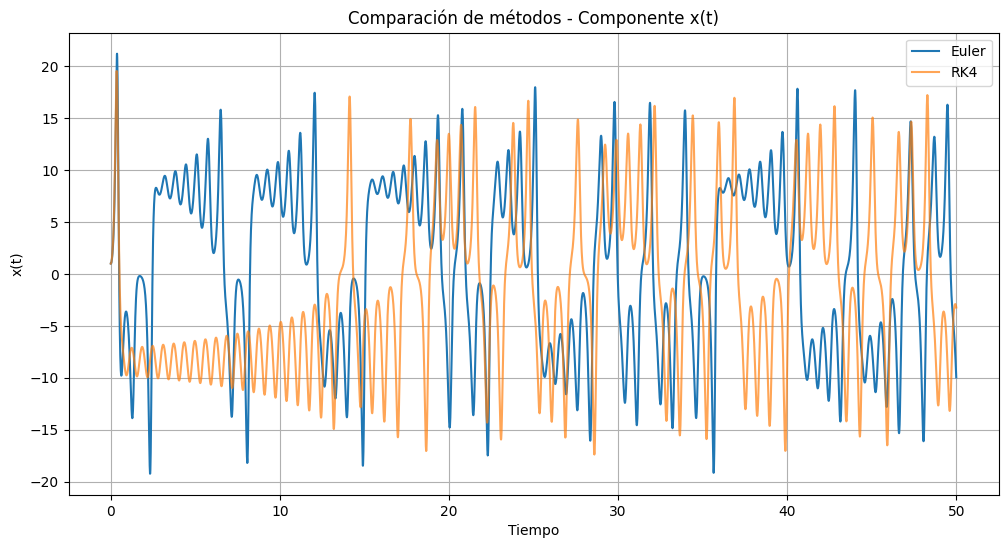

In [7]:
# Comparación de las componentes x(t)
plt.figure(figsize=(12, 6))
plt.plot(t_euler, states_euler[:, 0], label="Euler")
plt.plot(t_rk4, states_rk4[:, 0], label="RK4", alpha=0.7)
plt.title("Comparación de métodos - Componente x(t)")
plt.xlabel("Tiempo")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.show()

### 5.3. Animación 3D

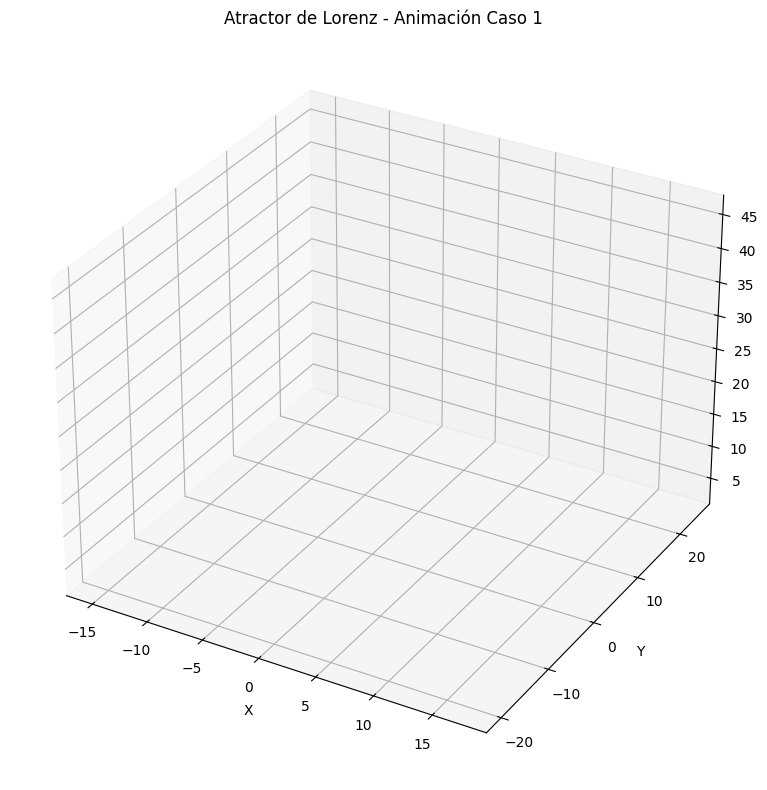

MovieWriter ffmpeg unavailable; using Pillow instead.


In [8]:
# Configuración de la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Preparar datos (usaremos RK4 para la animación)
x, y, z = states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2]

# Inicializar línea y punto
line, = ax.plot([], [], [], lw=0.5)
point, = ax.plot([], [], [], 'ro', markersize=6)

# Configurar límites
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz - Animación Caso 1")

# Función de inicialización
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Función de animación
def animate(i):
    # Usamos los primeros i puntos para la línea
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    
    # Marcamos el punto actual
    point.set_data(x[i:i+1], y[i:i+1])
    point.set_3d_properties(z[i:i+1])
    
    return line, point

# Crear animación (mostrar cada 10 frames para hacerlo más rápido)
ani = FuncAnimation(fig, animate, frames=range(0, len(x), 10),
                    init_func=init, blit=True, interval=20)

plt.tight_layout()
plt.show()

#Para guardar la animación en un gif
ani.save('lorenz_attractor_case1.gif', fps=30)

### 6. Simulación para caso 2

In [9]:
# Parámetros y condiciones iniciales (primer caso del proyecto)
sigma, rho, beta = 10, 28, 8/3
initial_state = np.array([1.002025, 0.2, 0.4])  # x0, y0, z0

# Configuración temporal
t0, tf, dt = 0, 50, 0.01

# Ejecutar ambos métodos
t_euler, states_euler = euler_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))
t_rk4, states_rk4 = rk4_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))

### 6.1. Visualización de resultados

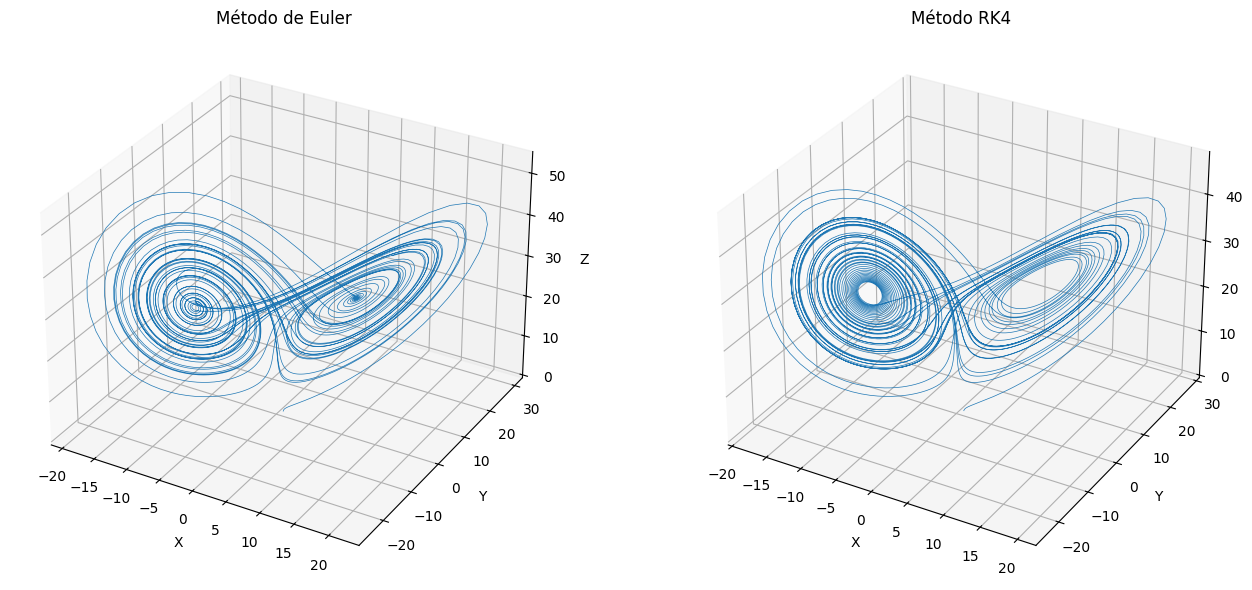

In [10]:
# Gráficas de las trayectorias en 3D
fig = plt.figure(figsize=(14, 6))

# Método de Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(states_euler[:, 0], states_euler[:, 1], states_euler[:, 2], lw=0.5)
ax1.set_title("Método de Euler")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Método RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2], lw=0.5)
ax2.set_title("Método RK4")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

### 6.3. Animación 3D

MovieWriter ffmpeg unavailable; using Pillow instead.


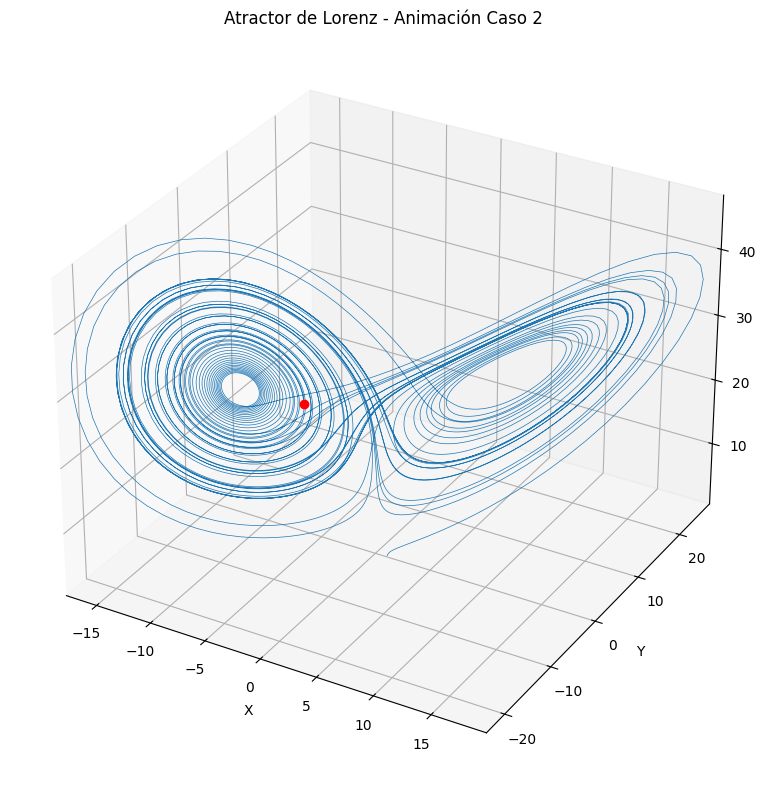

In [11]:
# Configuración de la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Preparar datos (usaremos RK4 para la animación)
x, y, z = states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2]

# Inicializar línea y punto
line, = ax.plot([], [], [], lw=0.5)
point, = ax.plot([], [], [], 'ro', markersize=6)

# Configurar límites
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz - Animación Caso 2")

# Función de inicialización
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Función de animación
def animate(i):
    # Usamos los primeros i puntos para la línea
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    
    # Marcamos el punto actual
    point.set_data(x[i:i+1], y[i:i+1])
    point.set_3d_properties(z[i:i+1])
    
    return line, point

# Crear animación (mostrar cada 10 frames para hacerlo más rápido)
ani = FuncAnimation(fig, animate, frames=range(0, len(x), 10),
                    init_func=init, blit=True, interval=20)

plt.tight_layout()

# Para guardar la animación
ani.save('lorenz_attractor_case2.gif', fps=30)

### 7. Simulación para caso 3

In [12]:
# Parámetros y condiciones iniciales (primer caso del proyecto)
sigma, rho, beta = 9, 18, 10/3
initial_state = np.array([2, 0.009, 0.7])  # x0, y0, z0

# Configuración temporal
t0, tf, dt = 0, 50, 0.01

# Ejecutar ambos métodos
t_euler, states_euler = euler_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))
t_rk4, states_rk4 = rk4_method(lorenz_system, initial_state, t0, tf, dt, (sigma, rho, beta))

7.1. Visualización de resultados

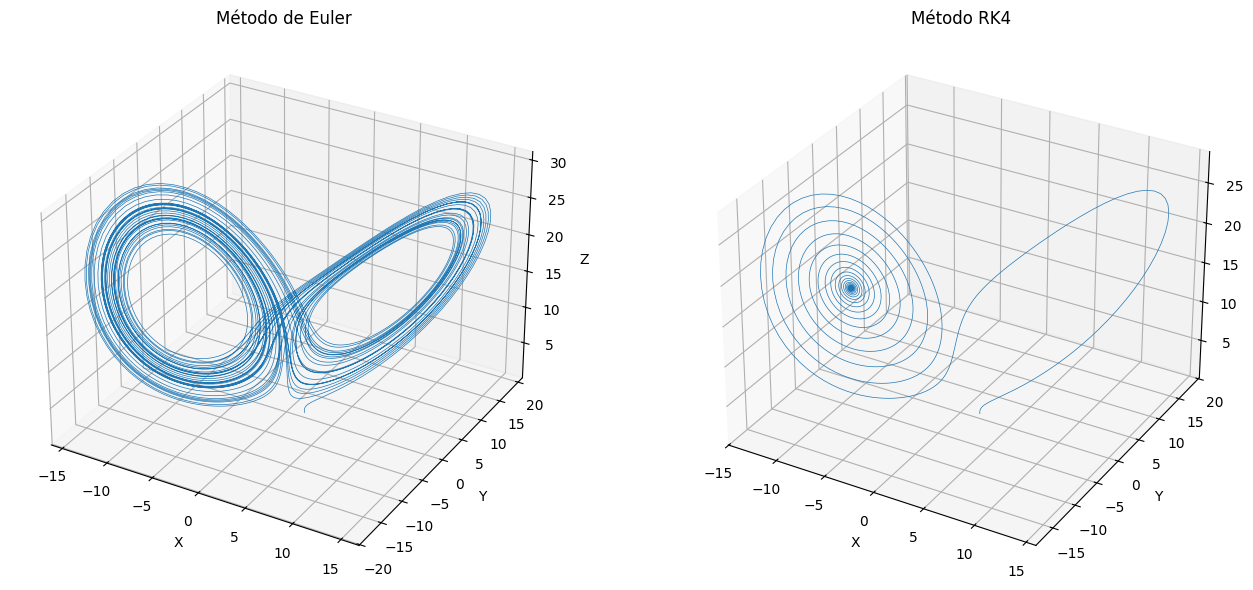

In [13]:
# Gráficas de las trayectorias en 3D
fig = plt.figure(figsize=(14, 6))

# Método de Euler
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(states_euler[:, 0], states_euler[:, 1], states_euler[:, 2], lw=0.5)
ax1.set_title("Método de Euler")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Método RK4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2], lw=0.5)
ax2.set_title("Método RK4")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()
plt.show()

### 7.3. Animación 3D

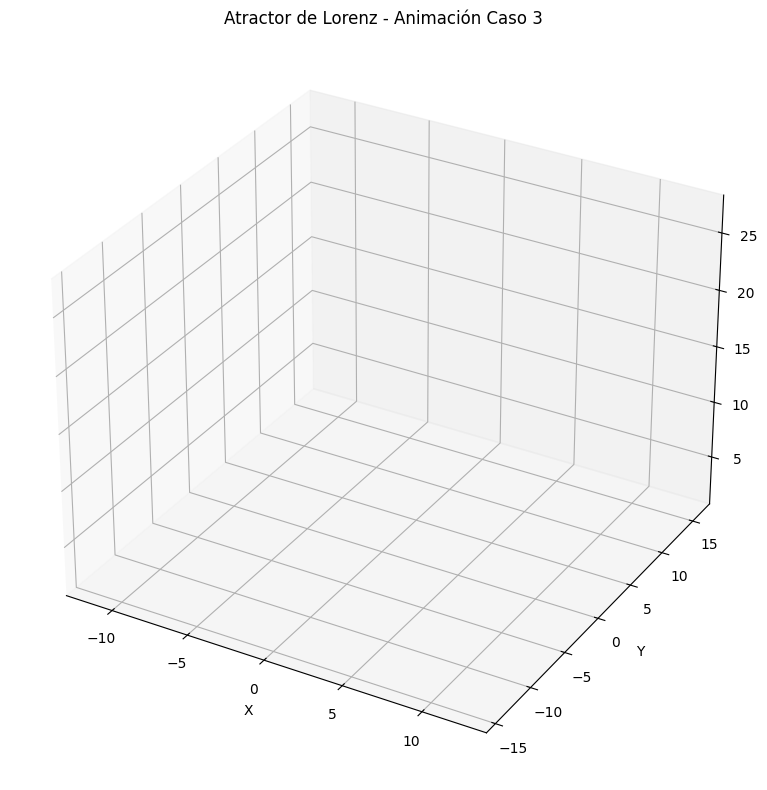

MovieWriter ffmpeg unavailable; using Pillow instead.


In [14]:
# Configuración de la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Preparar datos (usaremos RK4 para la animación)
x, y, z = states_rk4[:, 0], states_rk4[:, 1], states_rk4[:, 2]

# Inicializar línea y punto
line, = ax.plot([], [], [], lw=0.5)
point, = ax.plot([], [], [], 'ro', markersize=6)

# Configurar límites
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))
ax.set_zlim(min(z), max(z))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz - Animación Caso 3")

# Función de inicialización
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

# Función de animación
def animate(i):
    # Usamos los primeros i puntos para la línea
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    
    # Marcamos el punto actual
    point.set_data(x[i:i+1], y[i:i+1])
    point.set_3d_properties(z[i:i+1])
    
    return line, point

# Crear animación (mostrar cada 10 frames para hacerlo más rápido)
ani = FuncAnimation(fig, animate, frames=range(0, len(x), 10),
                    init_func=init, blit=True, interval=20)

plt.tight_layout()
plt.show()

# Para guardar la animación
ani.save('lorenz_attractor_case3.gif', fps=30)

#### Referencias Bibliográficas

1. **Lorenz, E. N. (1963)**  
   *Deterministic Nonperiodic Flow*  
   Journal of the Atmospheric Sciences, 20(2), 130-141.  
   [DOI:10.1175/1520-0469(1963)020<0130:DNF>2.0.CO;2]  
   *Estudio seminal que introduce el sistema de ecuaciones y sus propiedades caóticas*

2. **Strogatz, S. H. (2018)**  
   *Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering*  
   CRC Press, 2nd ed. (Capítulo 9)  
   *Análisis comparativo de métodos numéricos para sistemas caóticos*

3. **Butcher, J. C. (2016)**  
   *Numerical Methods for Ordinary Differential Equations*  
   Wiley, 3rd ed. (Secciones 3.1-3.4)  
   *Fundamentos teóricos de los errores en Euler (O(h)) vs RK4 (O(h⁴))*

4. **Sparrow, C. (1982)**  
   *The Lorenz Equations: Bifurcations, Chaos, and Strange Attractors*  
   Springer-Verlag (Apéndice C)  
   *Recomendación explícita de RK4 para simulaciones del atractor*

5. **Hairer, E., Nørsett, S. P., & Wanner, G. (1993)**  
   *Solving Ordinary Differential Equations I: Nonstiff Problems*  
   Springer (Capítulo II.4)  
   *Estabilidad comparativa de ambos métodos en sistemas no lineales*

6. **NASA Technical Report (2007)**  
   *Numerical Analysis of the Lorenz System*  
   NASA/CR-2007-214558  
   *Estudio empírico mostrando que Euler requiere h < 0.001 vs RK4 con h < 0.01 para misma precisión*

7. **Cuell, C. & Bountis, T. (2008)**  
   *Memory Effects in the Lorenz System*  
   Physical Review E 77(3)  
   [DOI:10.1103/PhysRevE.77.036206]  
   *Demuestra cómo Euler distorsiona la estructura fractal del atractor*